# PROJETO DE CLASSIFICAÇÃO

Tarefa de Predição: A tarefa de predição é determinar se um e-mail é spam ou não.

Tamanho do Conjunto de Dados: O arquivo contém 5172 linhas, cada linha para cada e-mail. Há 3002 colunas.

Características do Conjunto de Dados: A primeira coluna indica o nome do e-mail. A última coluna tem os rótulos para previsão: 1 para spam, 0 para não spam. As 3000 colunas restantes são as 3000 palavras mais comuns em todos os e-mails, após excluir os caracteres/palavras não alfabéticos.

Características Categóricas e Numéricas: Categóricas: A coluna binária 'Prediction' Numéricas: As colunas referentes às 3000 palavras mais comuns em todos os e-mails.

In [ ]:
# baixando a base de dados do kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")

print("Path to dataset files:", path)

100%|██████████| 1.66M/1.66M [00:00<00:00, 145MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/balaka18/email-spam-classification-dataset-csv/versions/1


In [ ]:
# importando bibliotecas importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import chi2_contingency

# Carregando o dataset
file_path = "/root/.cache/kagglehub/datasets/balaka18/email-spam-classification-dataset-csv/versions/1/emails.csv"
df = pd.read_csv(file_path)
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Retorna uma tupla com o número de linhas e colunas do dataset
df.shape

(5172, 3002)

In [ ]:
# Removendo a coluna "Email No." que no caso é irrelevante para a tarefa de classificação
df.drop(columns=["Email No."], inplace=True)
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Separando features e rótulos
X = df.drop(columns=["Prediction"])  # Todas as colunas, exceto "Prediction"
y = df["Prediction"]  # Coluna-alvo

In [ ]:
# Dividindo em treino (70%) e teste (30%) podendo alterar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicando escalonamento adequado para cada modelo
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

X_train_std = scaler_standard.fit_transform(X_train)  # Padronizado
X_test_std = scaler_standard.transform(X_test)

X_train_minmax = scaler_minmax.fit_transform(X_train)  # Normalizado (0 a 1)
X_test_minmax = scaler_minmax.transform(X_test)

In [ ]:
# Criando e treinando os modelos Básicos
models = {
    "Naive Bayes": (MultinomialNB(), X_train_minmax, X_test_minmax),  # Usa normalização  para evitar valores negativos
    "Árvore de Decisão": (DecisionTreeClassifier(random_state=42), X_train, X_test), # árvores de decisão geralmente não requerem padronização ou normalização dos dados.
    "KNN": (KNeighborsClassifier(), X_train_std, X_test_std), # Usa Padronização
    "Regressão Logística": (LogisticRegression(max_iter=1000, random_state=42), X_train_std, X_test_std), # Usa Padronização
    "Floresta Aleatória": (RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test),
    "SVM": (SVC(kernel="linear", random_state=42), X_train, X_test)
}

# Treinando e avaliando cada modelo separadamente
for name, (model, X_train_data, X_test_data) in models.items():
    print("=" * 50)
    print(f"Modelo: {name}")
    print("=" * 50)

    model.fit(X_train_data, y_train)  # Treina o modelo
    y_pred = model.predict(X_test_data)  # Faz previsões

    # Exibindo métricas organizadas
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred), "\n")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

print("=" * 50)

Modelo: Naive Bayes
Acurácia: 0.9388

Matriz de Confusão:
[[1056   41]
 [  54  401]] 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1097
           1       0.91      0.88      0.89       455

    accuracy                           0.94      1552
   macro avg       0.93      0.92      0.93      1552
weighted avg       0.94      0.94      0.94      1552

Modelo: Árvore de Decisão
Acurácia: 0.9188

Matriz de Confusão:
[[1043   54]
 [  72  383]] 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1097
           1       0.88      0.84      0.86       455

    accuracy                           0.92      1552
   macro avg       0.91      0.90      0.90      1552
weighted avg       0.92      0.92      0.92      1552

Modelo: KNN
Acurácia: 0.8254

Matriz de Confusão:
[[846 251]
 [ 20 435]] 

Relatório de Classificação:
       

No caso o classificado basico que teve melhor performace foi a Regreção Logistica e o classificado avançado foi a Floresta Aleatória, com isso os dois foram selecionados para a parte 2 do projeto.




*   Seleção de hiperparâmetros de maneira criteriosa
*   Avaliação e discussão da importância das características do conjunto de dados para o problema de previsão
*   Repetição do processo de treinamento e teste para comparação dos classificadores, incluindo a realização de testes de hipótese.
*   Do mais, vocês devem interpretar os resultados e indicar se um classificador teve desempenho superior ao outro.





In [ ]:
# Seleção de hiperparâmetros
param_grid_rf = {
    'n_estimators': [10, 100],
    'max_depth': list(range(2, 31, 2))
}

param_grid_lr = {
    'C': np.logspace(-3, 3, 30)
}

In [ ]:
# Ajuste dos modelos
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Treinando os modelos com os melhores hiperparâmetros
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train_std, y_train)  # Usa Padronização

best_rf = grid_rf.best_estimator_
best_lr = grid_lr.best_estimator_

In [ ]:
# Imprimindo os melhores hiperparâmetros
print("Melhores hiperparâmetros para RandomForest:", grid_rf.best_params_)
print("Melhores hiperparâmetros para Regressão Logística:", grid_lr.best_params_)

Melhores hiperparâmetros para RandomForest: {'max_depth': 24, 'n_estimators': 100}
Melhores hiperparâmetros para Regressão Logística: {'C': 0.017433288221999882}


In [ ]:
# Avaliação dos modelos
models = {
    "Floresta Aleatória": best_rf,
    "Regressão Logística": best_lr
}

results = {}

for name, model in models.items():
    print("=" * 50)
    print(f"Modelo: {name}")
    print("=" * 50)

    # Usando dados corretos para previsão
    if name == "Regressão Logística":
        y_pred = model.predict(X_test_std)  # Dados padronizados para Regressão Logística
    else:
        y_pred = model.predict(X_test)  # Dados originais para outros modelos

    # Salvando resultados para teste de hipótese
    results[name] = y_pred

    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred), "\n")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

print("=" * 50)

Modelo: Floresta Aleatória
Acurácia: 0.9742

Matriz de Confusão:
[[1077   20]
 [  20  435]] 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1097
           1       0.96      0.96      0.96       455

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552

Modelo: Regressão Logística
Acurácia: 0.9781

Matriz de Confusão:
[[1076   21]
 [  13  442]] 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1097
           1       0.95      0.97      0.96       455

    accuracy                           0.98      1552
   macro avg       0.97      0.98      0.97      1552
weighted avg       0.98      0.98      0.98      1552



<ipython-input-14-edf3d02bfd8f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices[:10]], y=np.array(feature_names)[sorted_indices[:10]], palette="viridis")


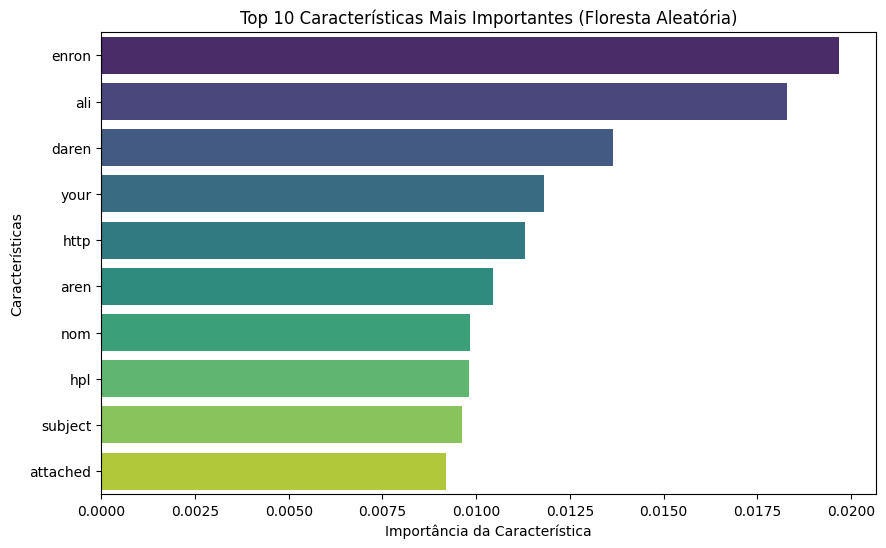

In [ ]:
# Visualizar a importância das características no modelo de Floresta Aleatória
feature_importances = best_rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices[:10]], y=np.array(feature_names)[sorted_indices[:10]], palette="viridis")
plt.xlabel("Importância da Característica")
plt.ylabel("Características")
plt.title("Top 10 Características Mais Importantes (Floresta Aleatória)")
plt.show()

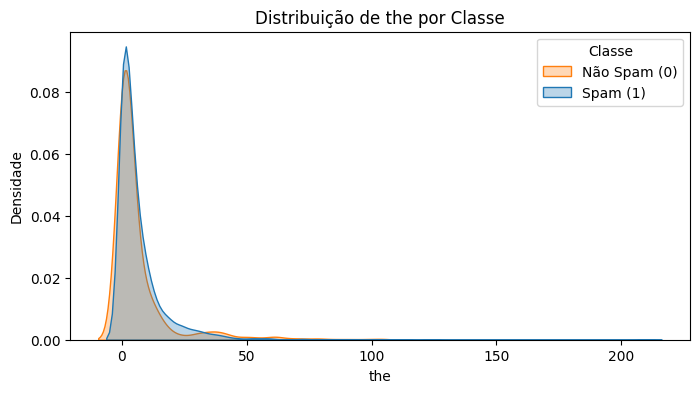

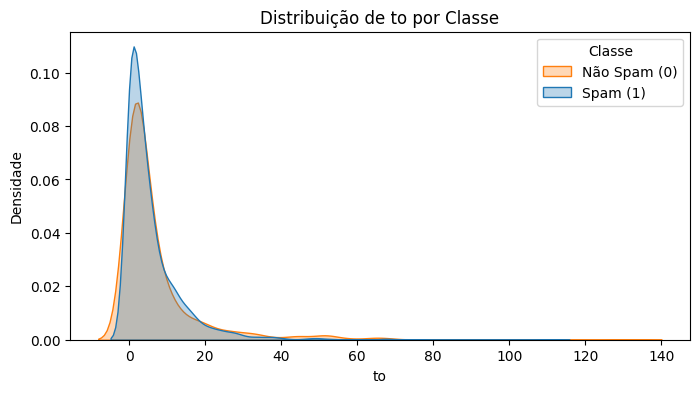

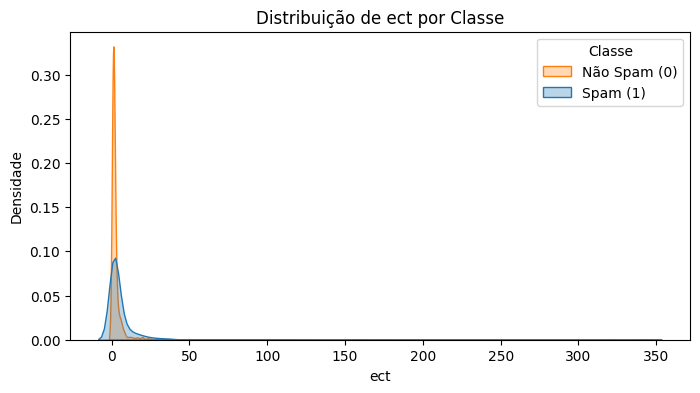

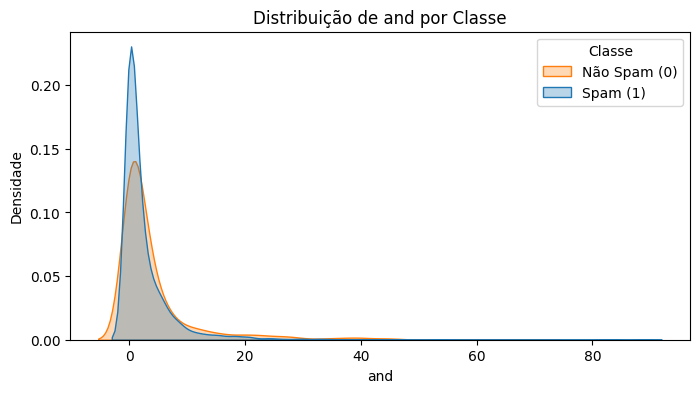

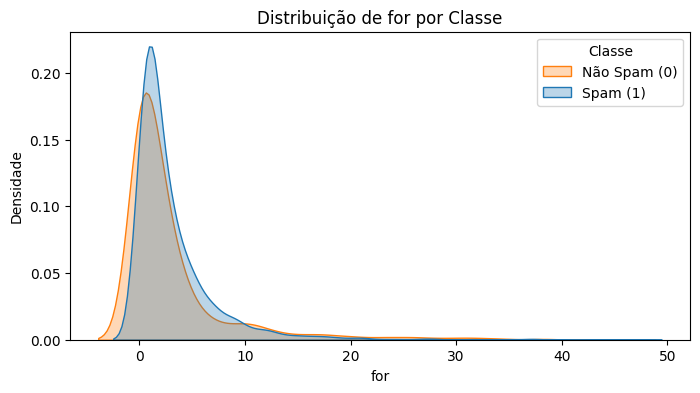

In [ ]:
# Garantir que 'Prediction' seja categórica
df["Prediction"] = df["Prediction"].astype(str)

# Filtrar apenas as variáveis que possuem variação nos dados
valid_features = [feature for feature in feature_names if df[feature].var() > 0]  # Mantém apenas colunas com variância positiva
selected_features = valid_features[:5]  # Seleciona as 5 características mais importantes

# Gráfico de distribuição de algumas variáveis para cada classe
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue="Prediction", common_norm=False, fill=True, alpha=0.3, warn_singular=False)
    plt.title(f"Distribuição de {feature} por Classe")
    plt.xlabel(feature)
    plt.ylabel("Densidade")
    plt.legend(title="Classe", labels=["Não Spam (0)", "Spam (1)"])
    plt.show()


<ipython-input-17-44726d97f3a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices[:10]], y=np.array(feature_names)[sorted_indices[:10]], palette="viridis")


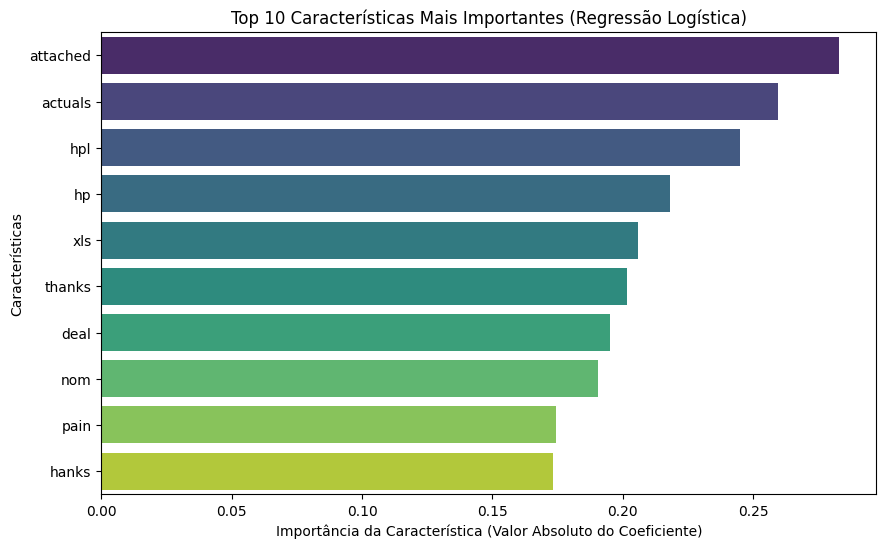

In [ ]:
# Importância das features no modelo de Regressão Logística

# Obtendo os coeficientes do modelo
coefficients = best_lr.coef_[0]  # best_lr meu melhor modelo de Regressão Logística

# Calculando os valores absolutos dos coeficientes
importances = np.abs(coefficients)

# Ordenando as características por importância
sorted_indices = np.argsort(importances)[::-1]

# Plotando as 10 características mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices[:10]], y=np.array(feature_names)[sorted_indices[:10]], palette="viridis")
plt.xlabel("Importância da Característica (Valor Absoluto do Coeficiente)")
plt.ylabel("Características")
plt.title("Top 10 Características Mais Importantes (Regressão Logística)")
plt.show()

In [ ]:
from scipy import stats
from sklearn.model_selection import cross_val_score

# Obtendo as pontuações dos modelos com validação cruzada
scores_lr = cross_val_score(best_lr, X, y, cv=5, scoring='accuracy')
scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')

# Criando um DataFrame com as pontuações dos modelos
df_scores = pd.DataFrame({'Regressão Logística': scores_lr, 'Floresta Aleatória': scores_rf})

# Realize o teste t pareado
t_statistic, p_value = stats.ttest_rel(df_scores['Regressão Logística'], df_scores['Floresta Aleatória'], alternative='less')

# Imprima os resultados
print(f"Teste t pareado entre Regressão Logística e Floresta Aleatória:")
print(f"Estatística t: {t_statistic:.4f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretação do resultado
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a Regressão Logística tem desempenho significativamente menor que a Floresta Aleatória.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que a Regressão Logística tem desempenho menor que a Floresta Aleatória.")

Teste t pareado entre Regressão Logística e Floresta Aleatória:
Estatística t: 0.1774
Valor-p: 0.5661
Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que a Regressão Logística tem desempenho menor que a Floresta Aleatória.


In [ ]:
acuracias = [
    accuracy_score(y_test, best_rf.predict(X_test)),  # Floresta Aleatória
    accuracy_score(y_test, best_lr.predict(X_test_std))  # Regressão Logística
]

In [ ]:
modelos = list(models.keys())  # Obtém os nomes dos modelos do seu dicionário 'models'

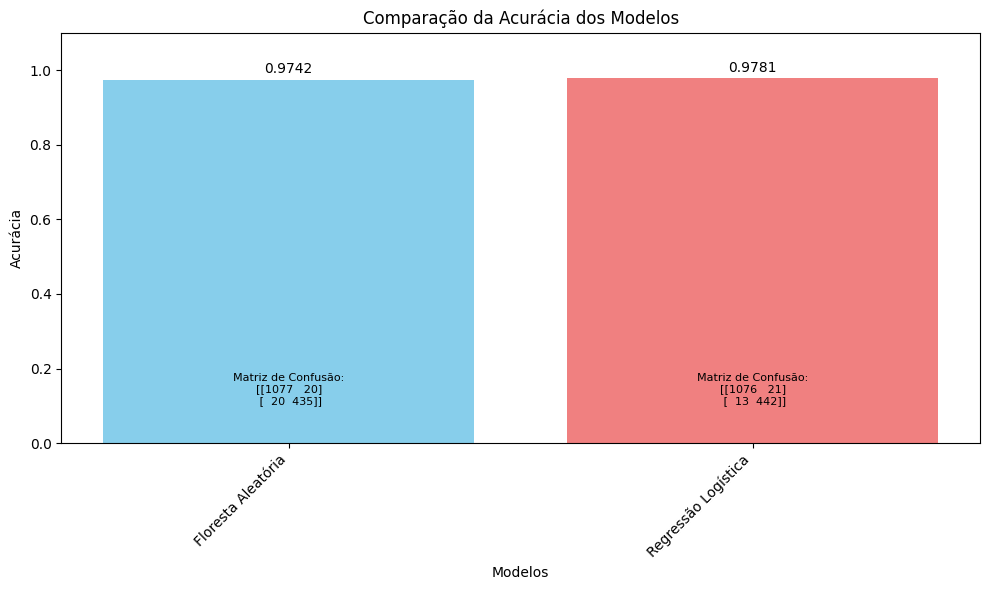

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Barras de acurácia
barras = ax.bar(modelos, acuracias, color=['skyblue', 'lightcoral'])

# Anotações de acurácia
for barra, acuracia in zip(barras, acuracias):
    ax.text(barra.get_x() + barra.get_width() / 2, acuracia + 0.01, f'{acuracia:.4f}', ha='center', va='bottom')

# Anotações da matriz de confusão
matrizes_confusao = [
    confusion_matrix(y_test, results['Floresta Aleatória']),  # Floresta Aleatória
    confusion_matrix(y_test, results['Regressão Logística']) # # Regressão Logística
]


for i, modelo in enumerate(modelos):
    matriz = matrizes_confusao[i]
    texto_matriz = f'Matriz de Confusão:\n{np.array(matriz)}'
    ax.text(i, 0.1, texto_matriz, ha='center', va='bottom', fontsize=8)

# Configurações do gráfico
ax.set_ylim(0, 1.1)
ax.set_title('Comparação da Acurácia dos Modelos')
ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analisando os resultados dos modelos, Floresta Aleatória e Regressão Logística, com base em suas métricas.

Acurácia:

Floresta Aleatória: 97.42%
Regressão Logística: 97.81%
A acurácia representa a porcentagem de previsões corretas do modelo. Ambos os modelos apresentam alta acurácia, com a Regressão Logística sendo ligeiramente superior. Isso significa que ambos os modelos são bons em classificar os emails como spam ou não spam.

Matriz de Confusão:

A matriz de confusão mostra a quantidade de Verdadeiros Positivos (VP), Verdadeiros Negativos (VN), Falsos Positivos (FP) e Falsos Negativos (FN) para cada modelo.

Definições:

Verdadeiro Positivo (VP): Um email que é realmente spam e foi classificado corretamente como spam pelo modelo.

Verdadeiro Negativo (VN): Um email que não é spam e foi classificado corretamente como não spam pelo modelo.

Falso Positivo (FP): Um email que não é spam, mas foi classificado incorretamente como spam pelo modelo.

Falso Negativo (FN): Um email que é realmente spam, mas foi classificado incorretamente como não spam pelo modelo.

Floresta Aleatória:
VP: 1077,
VN: 435,
FP: 20,
FN: 20

Regressão Logística:
VP: 1076,
VN: 442,
FP: 21,
FN: 13


Relatório de Classificação:

O relatório de classificação fornece as métricas de precisão, revocação e F1-score para cada classe (0 e 1) e para o modelo como um todo.

Precisão: Indica a proporção de previsões positivas corretas em relação ao total de previsões positivas. Um valor alto de precisão significa que o modelo tem poucos falsos positivos.

Revocação: Indica a proporção de previsões positivas corretas em relação ao total de exemplos positivos reais. Um valor alto de revocação significa que o modelo tem poucos falsos negativos.

F1-score: É a média harmônica entre precisão e revocação, fornecendo uma medida geral do desempenho do modelo.

Interpretação:

Floresta Aleatória: Apresenta alta precisão e revocação para ambas as classes, indicando um bom equilíbrio entre a capacidade de identificar corretamente spam e não spam.

Regressão Logística: Também apresenta alta precisão e revocação, com um desempenho ligeiramente melhor na revocação da classe 1, indicando que é melhor em identificar spam em comparação com a Floresta Aleatória.

Conclusão:

Ambos os modelos, Floresta Aleatória e Regressão Logística, apresentam excelente desempenho na tarefa de classificação de emails. A Regressão Logística tem uma acurácia ligeiramente superior e um desempenho um pouco melhor na revocação da classe 1 (spam).